In [1]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar librerias para el preprocesamiento
from sklearn.preprocessing import StandardScaler

# Importar librrias para normalizacioón y escalado
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Importar librerias para la selección de características
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Importar librerias para la selección de modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Importar librerias para la evaluación de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Importar modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Configurción de gráficos
plt.rcParams['figure.figsize'] = (6, 4)

# Fuente Palatino Linotype
plt.rcParams['font.family'] = 'Palatino Linotype'

# Paleta de colores viridis
plt.rcParams['image.cmap'] = 'viridis'

# Configuración de los estilos de los gráficos
plt.style.use('ggplot')

# Grosor y color de linea bordes de los gráficos
plt.rcParams['axes.linewidth'] = 2.1
plt.rcParams['axes.edgecolor'] = 'black'

In [3]:
# Cargar dataset df
df = pd.read_csv('diabetes.csv')

# Mostrar las primeras 5 filas del dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Mostrar las dimensiones del dataset
df.shape

(768, 9)

In [5]:
# Mostrar información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Mostrar estadísticas descriptivas del dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Mostrar la cantidad de valores nulos en el dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

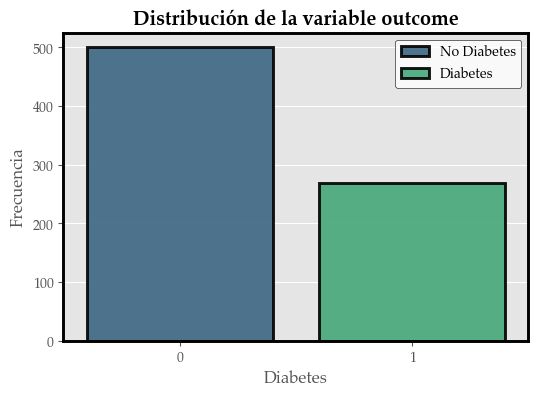

In [8]:
# Grafica de barras moderno
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='viridis', edgecolor='black', linewidth=2.1, alpha=0.9, hue='Outcome')
plt.title('Distribución de la variable outcome', fontweight='bold')
# Eje x
plt.xlabel('Diabetes')
# Eje y
plt.ylabel('Frecuencia')
# Leyenda con fondo de contraste
plt.legend(['No Diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

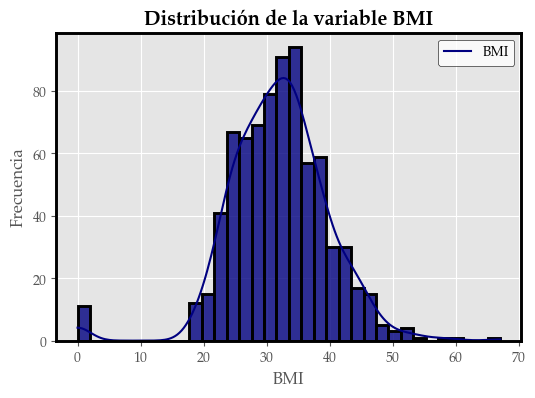

In [9]:
# Histograma de la variable BMI
plt.figure(figsize=(6, 4))
sns.histplot(df['BMI'], kde=True, color='navy', edgecolor='black', linewidth=2.1, alpha=0.8)
plt.title('Distribución de la variable BMI', fontweight='bold')
# Eje x
plt.xlabel('BMI')
# Eje y
plt.ylabel('Frecuencia')
# Leyenda
plt.legend(['BMI'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

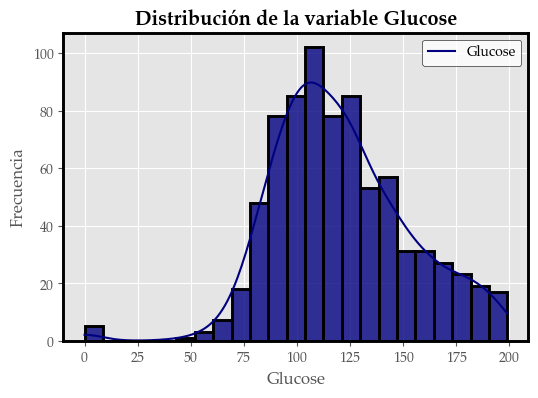

In [10]:
# Histograma de la variable Glucose
plt.figure(figsize=(6, 4))
sns.histplot(df['Glucose'], kde=True, color='navy', edgecolor='black', linewidth=2.1, alpha=0.8)
plt.title('Distribución de la variable Glucose', fontweight='bold')
# Eje x
plt.xlabel('Glucose')
# Eje y
plt.ylabel('Frecuencia')
# Leyenda
plt.legend(['Glucose'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

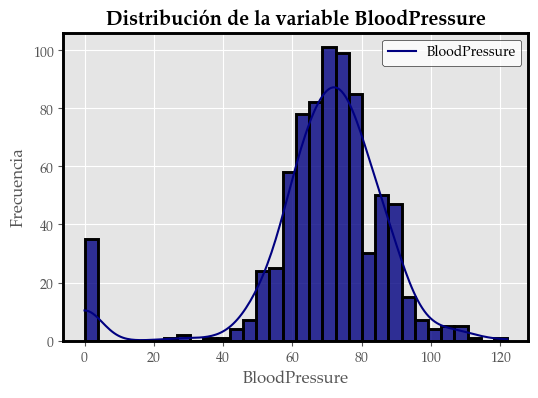

In [11]:
# Histograma de la variable BloodPressure
plt.figure(figsize=(6, 4))
sns.histplot(df['BloodPressure'], kde=True, color='navy', edgecolor='black', linewidth=2.1, alpha=0.8)
plt.title('Distribución de la variable BloodPressure', fontweight='bold')
# Eje x
plt.xlabel('BloodPressure')
# Eje y
plt.ylabel('Frecuencia')
# Leyenda
plt.legend(['BloodPressure'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

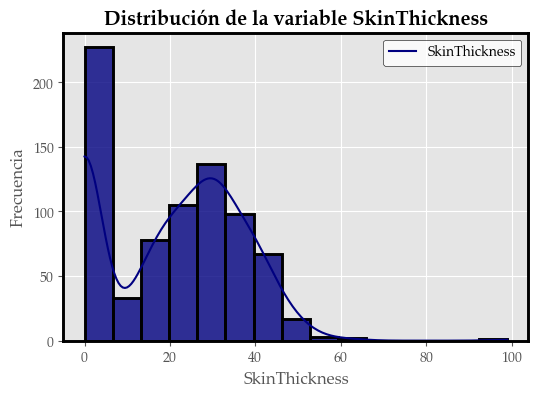

In [12]:
# Histograma de la variable SkinThickness
plt.figure(figsize=(6, 4))
sns.histplot(df['SkinThickness'], kde=True, color='navy', edgecolor='black', linewidth=2.1, alpha=0.8)
plt.title('Distribución de la variable SkinThickness', fontweight='bold')
# Eje x
plt.xlabel('SkinThickness')
# Eje y
plt.ylabel('Frecuencia')
# Leyenda
plt.legend(['SkinThickness'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

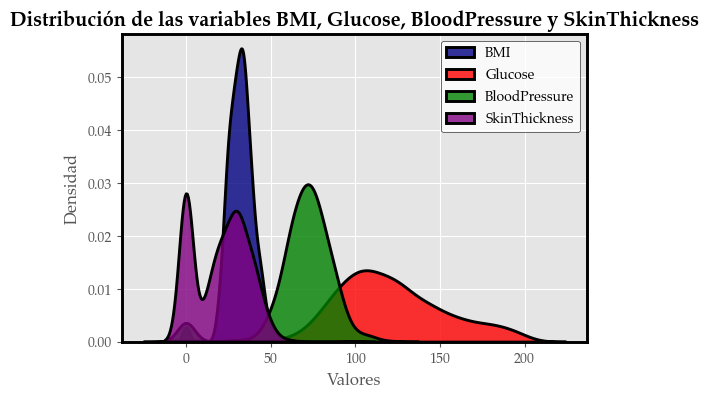

In [13]:
# 4 Gráficos de densidad de las variables en una cuadrícula 2x2
plt.figure(figsize=(6, 4))
sns.kdeplot(df['BMI'], color='navy', fill=True, alpha=0.8, edgecolor='black', linewidth=2.1)
sns.kdeplot(df['Glucose'], color='red', fill=True, alpha=0.8, edgecolor='black', linewidth=2.1)
sns.kdeplot(df['BloodPressure'], color='green', fill=True, alpha=0.8, edgecolor='black', linewidth=2.1)
sns.kdeplot(df['SkinThickness'], color='purple', fill=True, alpha=0.8, edgecolor='black', linewidth=2.1)
plt.title('Distribución de las variables BMI, Glucose, BloodPressure y SkinThickness', fontweight='bold')
# Eje x
plt.xlabel('Valores')
# Eje y
plt.ylabel('Densidad')
# Leyenda
plt.legend(['BMI', 'Glucose', 'BloodPressure', 'SkinThickness'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

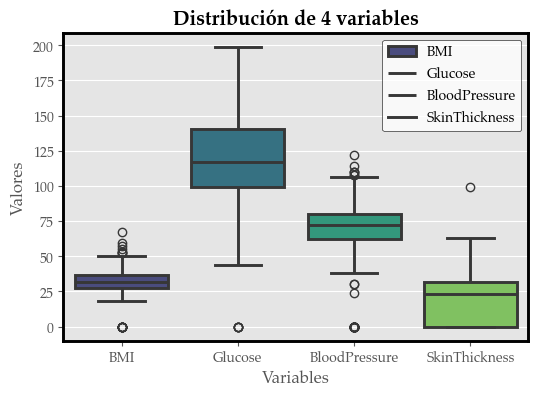

In [14]:
# Gráfico de cajas de las variables BMI, Glucose, BloodPressure y SkinThickness
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['BMI', 'Glucose', 'BloodPressure', 'SkinThickness']], palette='viridis', linewidth=2.1)
plt.title('Distribución de 4 variables', fontweight='bold')
# Eje x
plt.xlabel('Variables')
# Eje y
plt.ylabel('Valores')
# Leyenda con fondo de contraste
plt.legend(['BMI', 'Glucose', 'BloodPressure', 'SkinThickness'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

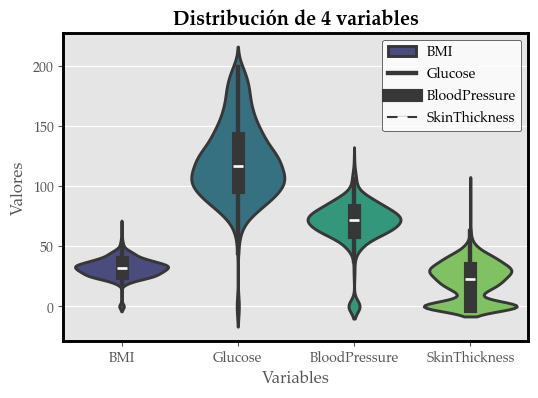

In [15]:
# Grafico de violín de las variables BMI, Glucose, BloodPressure y SkinThickness
plt.figure(figsize=(6, 4))
sns.violinplot(data=df[['BMI', 'Glucose', 'BloodPressure', 'SkinThickness']], palette='viridis', linewidth=2.1)
plt.title('Distribución de 4 variables', fontweight='bold')
# Eje x
plt.xlabel('Variables')
# Eje y
plt.ylabel('Valores')
# Leyenda con fondo de contraste
plt.legend(['BMI', 'Glucose', 'BloodPressure', 'SkinThickness'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

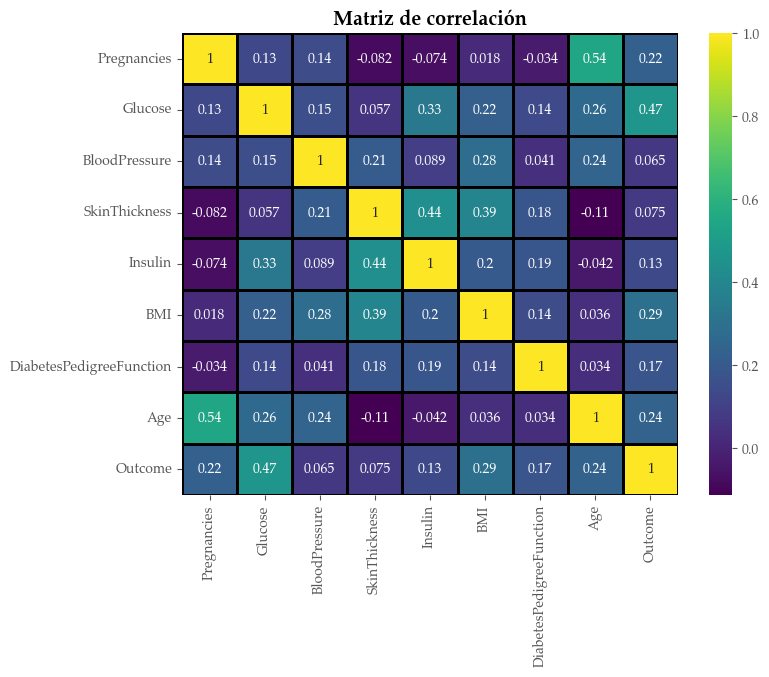

In [16]:
# Matriz de correlación moderna
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidth=2.1, linecolor='black')
plt.title('Matriz de correlación', fontweight='bold')
plt.show()

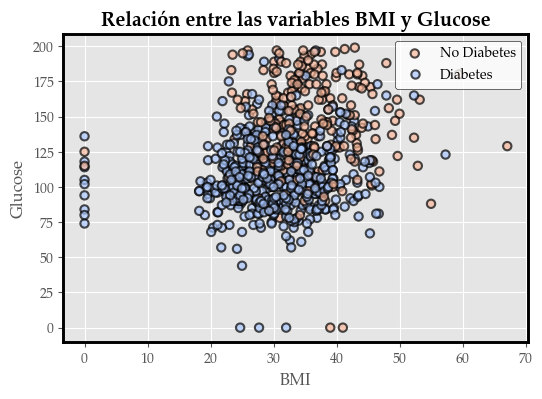

In [17]:
# Grafico de dispersión de las variables BMI y Glucose con colores diferentes y linea de tendencia
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMI', y='Glucose', data=df, hue='Outcome', palette='coolwarm', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.title('Relación entre las variables BMI y Glucose', fontweight='bold')
# Eje x
plt.xlabel('BMI')
# Eje y
plt.ylabel('Glucose')
# Leyenda con fondo de contraste
plt.legend(['No Diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

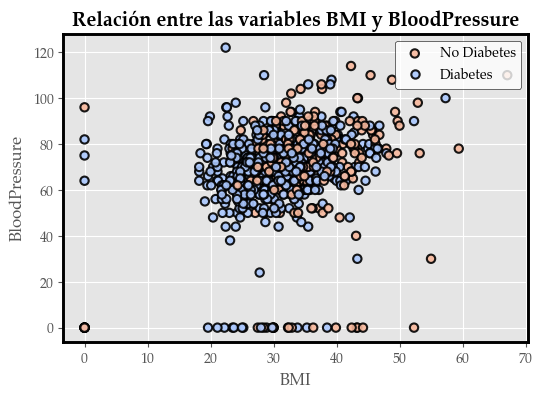

In [18]:
# Grafico de dispersión de las variables BMI y BloodPressure con colores diferentes y linea de tendencia
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMI', y='BloodPressure', data=df, hue='Outcome', palette='coolwarm', edgecolor='black', linewidth=1.5, alpha=0.9)
plt.title('Relación entre las variables BMI y BloodPressure', fontweight='bold')
# Eje x
plt.xlabel('BMI')
# Eje y
plt.ylabel('BloodPressure')
# Leyenda con fondo de contraste
plt.legend(['No Diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

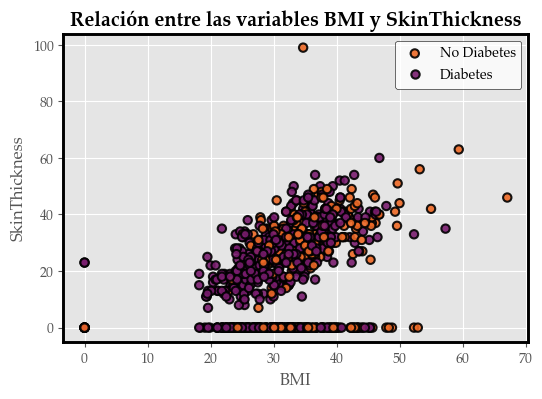

In [19]:
# Grafico de dispersión de las variables BMI y SkinThickness con colores diferentes y linea de tendencia
plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMI', y='SkinThickness', data=df, hue='Outcome', palette='inferno', edgecolor='black', linewidth=1.5, alpha=0.9)
plt.title('Relación entre las variables BMI y SkinThickness', fontweight='bold')
# Eje x
plt.xlabel('BMI')
# Eje y
plt.ylabel('SkinThickness')
# Leyenda con fondo de contraste
plt.legend(['No Diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

### **TRATAMIENTO ESTADÍSTICO DE DATOS Y PREPROCESAMIENTO**

In [20]:
# Ver conteo de valores de outcome
print(df['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [21]:
# Realizar un sobremuestreo de la clase minoritaria y mayoritaria de outcome
from sklearn.utils import resample

# Separar las clases
df_majority = df[df['Outcome'] == 0]
df_minority = df[df['Outcome'] == 1]

# Realizar el sobremuestreo y agreganr 1232 registros a la clase minoritaria y 732 a la clase mayoritaria
df_minority_upsampled = resample(df_minority, replace=True, n_samples=1232, random_state=123)
df_majority_upsampled = resample(df_majority, replace=True, n_samples=732, random_state=123)

# Unir los dataframes
df_upsampled = pd.concat([df_majority_upsampled, df_minority_upsampled])

# Integrar cambios a df
df = df_upsampled

# Ver conteo de valores de outcome
print(df['Outcome'].value_counts())

Outcome
1    1232
0     732
Name: count, dtype: int64


In [22]:
# Realizar sobre muestreo de la clase 0
df_minority = df[df['Outcome'] == 0]

# Realizar el sobremuestreo y agregar 500 registros a la clase mayoritaria
df_minority_upsampled = resample(df_minority, replace=True, n_samples=500, random_state=123)

# Integrar df_minority_upsampled a df
df = pd.concat([df, df_minority_upsampled])

# Ver conteo de valores de outcome
print(df['Outcome'].value_counts())

Outcome
0    1232
1    1232
Name: count, dtype: int64


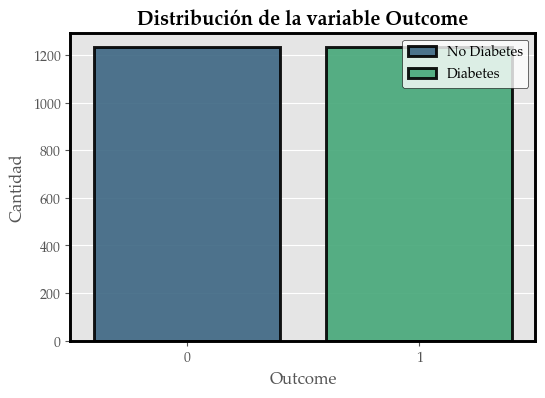

In [23]:
# Ver gráfico de barras de la variable Outcome
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome', palette='viridis', edgecolor='black', linewidth=2.1, alpha=0.9, hue='Outcome')
plt.title('Distribución de la variable Outcome', fontweight='bold')
# Eje x
plt.xlabel('Outcome')
# Eje y
plt.ylabel('Cantidad')
# Leyenda con fondo de contraste
plt.legend(['No Diabetes', 'Diabetes'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
562,1,87,68,34,77,37.6,0.401,24,0
583,8,100,76,0,0,38.7,0.190,42,0
505,10,75,82,0,0,33.3,0.263,38,0
727,0,141,84,26,0,32.4,0.433,22,0
151,4,114,65,0,0,21.9,0.432,37,0


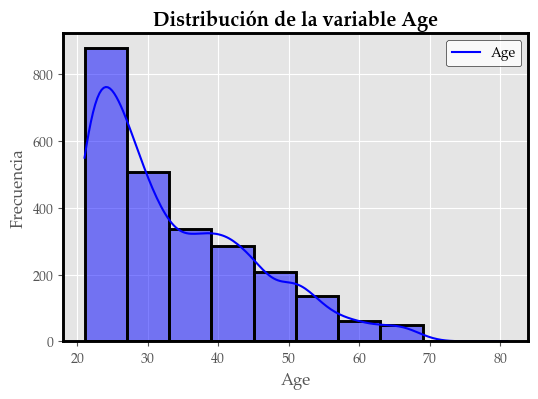

In [25]:
# Ver histograma de age
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=10, kde=True, color='blue', edgecolor='black', linewidth=2.1)
plt.title('Distribución de la variable Age', fontweight='bold')
# Eje x
plt.xlabel('Age')
# Eje y
plt.ylabel('Frecuencia')
# Leyenda con fondo de contraste
plt.legend(['Age'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

In [26]:
# Ver valor minimos y maximos de la variable Age
print('Valor mínimo de Age:', df['Age'].min())
print('Valor máximo de Age:', df['Age'].max())

Valor mínimo de Age: 21
Valor máximo de Age: 81


In [27]:
# Crear grupos de edad de 20-30, 31-40, +50 y crear columna AgeGroup
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '31-40', '41-50', '+50'])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
562,1,87,68,34,77,37.6,0.401,24,0,20-30
583,8,100,76,0,0,38.7,0.190,42,0,41-50
505,10,75,82,0,0,33.3,0.263,38,0,31-40
727,0,141,84,26,0,32.4,0.433,22,0,20-30
151,4,114,65,0,0,21.9,0.432,37,0,31-40


In [28]:
# Convertir Age_Group a numerico manualmenre creando una nueva columna AgeGroupNumeric
df['AgeGroupNumeric'] = df['AgeGroup'].map({'20-30': 1, '31-40': 2, '41-50': 3, '+50': 4})

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,AgeGroupNumeric
562,1,87,68,34,77,37.6,0.401,24,0,20-30,1
583,8,100,76,0,0,38.7,0.190,42,0,41-50,3
505,10,75,82,0,0,33.3,0.263,38,0,31-40,2
727,0,141,84,26,0,32.4,0.433,22,0,20-30,1
151,4,114,65,0,0,21.9,0.432,37,0,31-40,2


### **ENTRENAMIENTO DEL MODELO**

In [30]:
# Seleccionar caracteristicas numericas a excepcion de age
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'AgeGroupNumeric']

# Seleccionar variable objetivo
target = 'Outcome'

In [31]:
# Crear X y Y
X = df[features]
y = df[target]

# Escalar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Importar modelo de ramdon forest classifier
from sklearn.ensemble import RandomForestClassifier

# Crear modelo
model = RandomForestClassifier(n_estimators=100, random_state=28)

# Entrenar modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Precisión del modelo
from sklearn.metrics import accuracy_score

print('Precisión del modelo:', accuracy_score(y_test, y_pred))

# Reporte de clasificación
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9939148073022313
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       242
           1       0.99      1.00      0.99       251

    accuracy                           0.99       493
   macro avg       0.99      0.99      0.99       493
weighted avg       0.99      0.99      0.99       493



### **PREDICCIONES**

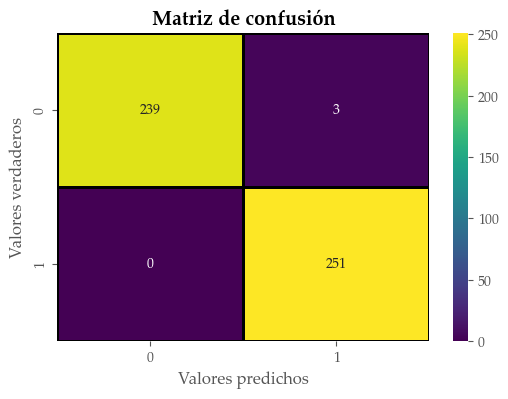

In [32]:
# Crear grafca de matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', linewidths=2.1, linecolor='black')
plt.title('Matriz de confusión', fontweight='bold')
# Eje x
plt.xlabel('Valores predichos')
# Eje y
plt.ylabel('Valores verdaderos')
plt.show()

In [33]:
# Crear un dataframe con las caracteristicas y su importancia
feature_importance = pd.DataFrame({'Caracteristica': features, 'Importancia': model.feature_importances_})

# Ordenar el dataframe por importancia
feature_importance = feature_importance.sort_values('Importancia', ascending=False)

# Ver el dataframe
print(feature_importance)

             Caracteristica  Importancia
1                   Glucose     0.273730
5                       BMI     0.173255
6  DiabetesPedigreeFunction     0.121489
0               Pregnancies     0.095155
7           AgeGroupNumeric     0.091455
2             BloodPressure     0.091124
4                   Insulin     0.081108
3             SkinThickness     0.072683


C:\Users\range\AppData\Local\Temp\ipykernel_3464\3210352099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importancia', y='Caracteristica', palette='viridis', edgecolor='black', linewidth=2.1)


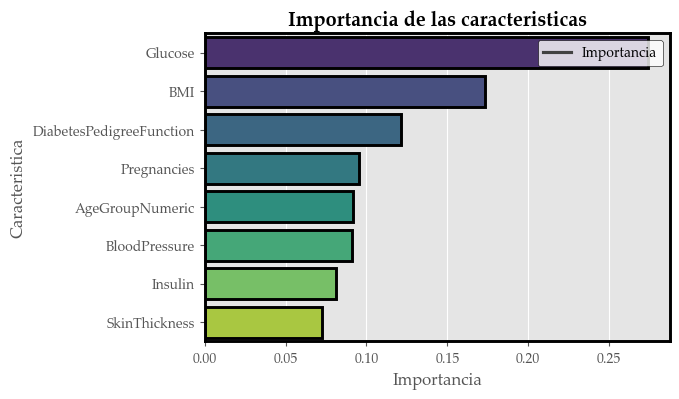

In [34]:
# Crear gráfico de barras de la importancia de las caracteristicas
plt.figure(figsize=(6, 4))
sns.barplot(data=feature_importance, x='Importancia', y='Caracteristica', palette='viridis', edgecolor='black', linewidth=2.1)
plt.title('Importancia de las caracteristicas', fontweight='bold')
# Eje x
plt.xlabel('Importancia')
# Eje y
plt.ylabel('Caracteristica')
# Leyenda con fondo de contraste
plt.legend(['Importancia'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()

### **PREDICCIÓN #1 - DATOS DE JDSR**

In [35]:
# Crear un dataframe para una predicción
data = {
        'Pregnancies': [0], 
        'Glucose': [100], 
        'BloodPressure': [100], 
        'SkinThickness': [20.1], 
        'Insulin': [100], 
        'BMI': [22.1], 
        'DiabetesPedigreeFunction': [0.0], 
        'AgeGroupNumeric': [1]
    }

# Crear dataframe
df_predict = pd.DataFrame(data)

In [36]:
# Escalar los datos
df_predict = scaler.transform(df_predict)

# Realizar predicción
prediction = model.predict(df_predict)

In [37]:
# Imprimir predicción de forma agradable y probabilidad en porcentaje con dos decimales
if prediction[0] == 0:
    print('El paciente no está en riesgo de diabetes con una probabilidad del', round(model.predict_proba(df_predict)[0][0] * 100, 2), '%')
else:
    print('El paciente está en riesgo de diabetes con una probabilidad del', round(model.predict_proba(df_predict)[0][1] * 100, 2), '%')

El paciente no está en riesgo de diabetes con una probabilidad del 93.0 %


In [38]:
# Crear diccionario de datos con las caracteristicas entrada y significado en español de data
data_dict = {
    'Embarazos': [1],
    'Glucosa': [85],
    'Presión sanguínea': [66],
    'Grosor de la piel': [29],
    'Insulina': [0],
    'IMC': [22.1],
    'Función de Pedigree de Diabetes': [0.0],
    'Grupo de Edad': ['20-30']
}

### **PREDICCIÓN #2**

In [39]:
# Crear un dataframe para una predicción
data2 = {
        'Pregnancies': [1], 
        'Glucose': [210], 
        'BloodPressure': [190], 
        'SkinThickness': [32.1], 
        'Insulin': [220], 
        'BMI': [34.1], 
        'DiabetesPedigreeFunction': [0.94], 
        'AgeGroupNumeric': [3]
    }

# Crear dataframe
df_predict = pd.DataFrame(data2)

# Escalar los datos
df_predict = scaler.transform(df_predict)

# Realizar predicción
prediction = model.predict(df_predict)

# Definir un umbral de riesgo bajo, riesgo moderado y riesgo alto
low_risk = 0.33
moderate_risk = 0.34
high_risk = 0.68

# Imprimir predicción de forma agradable y probabilidad en porcentaje con dos decimales
if prediction[0] == 0:
    if model.predict_proba(df_predict)[0][0] < low_risk:
        print('El paciente no está en riesgo de diabetes con una probabilidad del', round(model.predict_proba(df_predict)[0][0] * 100, 2), '%')
    elif model.predict_proba(df_predict)[0][0] < moderate_risk:
        print('El paciente tiene un riesgo moderado de diabetes con una probabilidad del', round(model.predict_proba(df_predict)[0][0] * 100, 2), '%')
    else:
        print('El paciente tiene un riesgo alto de diabetes con una probabilidad del', round(model.predict_proba(df_predict)[0][0] * 100, 2), '%')
else:
    if model.predict_proba(df_predict)[0][1] < low_risk:
        print('El paciente no está en riesgo de diabetes con una probabilidad del', round(model.predict_proba(df_predict)[0][1] * 100, 2), '%')
    elif model.predict_proba(df_predict)[0][1] < moderate_risk:
        print('El paciente tiene un riesgo moderado de diabetes con una probabilidad del', round(model.predict_proba(df_predict)[0][1] * 100, 2), '%')
    else:
        print('El paciente tiene un riesgo alto de diabetes con una probabilidad del', round(model.predict_proba(df_predict)[0][1] * 100, 2), '%')


El paciente tiene un riesgo alto de diabetes con una probabilidad del 71.0 %


### **GUARDAR ESCALADOR Y MODELO**

In [40]:
# Importar libreria para guardar el modelo y el escalador
import joblib

# Guardar el modelo
joblib.dump(model, 'Random-Forest-Model.pkl')

# Guardar el escalador
joblib.dump(scaler, 'Random-Forest-Scaler.pkl')

['Random-Forest-Scaler.pkl']